In [16]:
# churn prediction model


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [18]:
data = pd.read_csv("Churn_Modelling.csv")
print("Data loaded successfully")
data.head()

Data loaded successfully


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [19]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB
None
          RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10

In [20]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [21]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [22]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), ['Geography'])],
    remainder='passthrough'
)

X = ct.fit_transform(data.drop('Exited', axis=1))
y = data['Exited']


In [23]:
X = pd.DataFrame(X)
print(" Encoding complete")

 Encoding complete


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 8001
Testing samples: 2001


In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(" Data normalized")


 Data normalized


In [26]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model training complete")

Model training complete


Accuracy: 0.8660669665167416
ROC-AUC: 0.726256148899032

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1599
           1       0.76      0.49      0.60       402

    accuracy                           0.87      2001
   macro avg       0.82      0.73      0.76      2001
weighted avg       0.86      0.87      0.85      2001



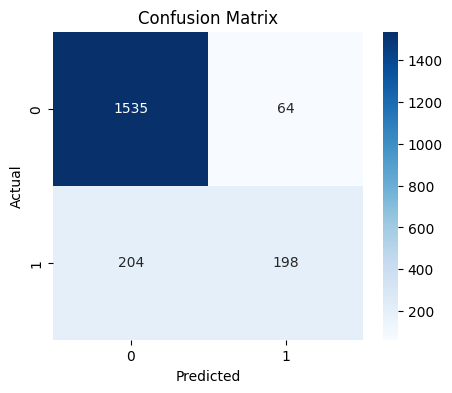

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

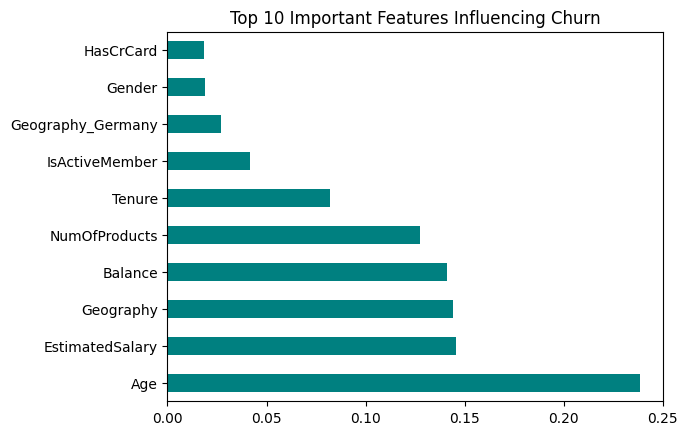

In [28]:
geography_features = ct.named_transformers_['encoder'].get_feature_names_out(['Geography'])
all_features = list(geography_features) + list(data.drop('Exited', axis=1).columns[1:])

importances = pd.Series(model.feature_importances_, index=all_features)
importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Important Features Influencing Churn")
plt.show()